In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [3]:
iris=load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
x=iris.data
y=iris.target
print(x.shape,y.shape)

(150, 4) (150,)


In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
y.shape

(150,)

In [7]:
mask = np.where((y==0)|(y==1))
x=x[mask][:,[0,2]]
y=y[mask]

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state=42)

In [9]:
y_test

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [10]:
print(np.unique(y_train))

[0 1]


In [11]:
print(x_train.shape,y_train.shape)

(80, 2) (80,)


In [12]:
setosas=x[np.where(y==0)]
versicolors=x[np.where(y==1)]

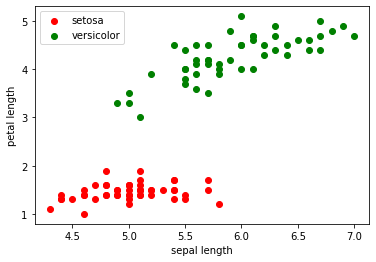

In [13]:
plt.scatter(setosas[:,0],setosas[:,1],color='r',label='setosa')
plt.scatter(versicolors[:,0],versicolors[:,1],color='g',label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()



In [14]:
print(x.shape,y.shape)

(100, 2) (100,)


In [15]:
# Functions used for perceptron


def step_function(t):
  if t >= 0:
    return 1
  else:
    return 0


def prediction(x,w,b):
  return step_function((np.dot(x,w)+b)[0])



In [16]:
# Weight updates

def perceptron_step(x,y,w,b,learn_rate=0.01):
  for (data,target) in zip(x,y):
    y_hat=prediction(data,w,b)
    error=target-y_hat
    w[0] += (learn_rate * error * data[0])
    w[1] += (learn_rate * error * data[1])
    b += (learn_rate * error)

  return w,b



In [17]:
from sklearn.utils.extmath import weighted_mode
# Traing Data
weights = []

def train_perceptron_algorithm(x, y, learn_rate=0.01, num_epochs=100, weight=weights):
  x_min, x_max = min(x.T[0]), max(x.T[0])
  y_min, y_max = min(x.T[1]), max(x_train.T[1])

  # initializing weight and bias
  w = np.array(np.random.rand(2,1))
  b = np.random.rand(1)[0] + x_max

  # These are the solution lines that get plotted  below
  boundary_lines = []
  for i in range(num_epochs):
    w,b = perceptron_step(x,y,w,b,learn_rate)
    print(f'epoch {i}, w: {w}, b= {b}')
    if i == 99:
      weight += [w[0][0],w[1][0],b]
    boundary_lines.append((-w[0]/w[1], -b/w[1]))
  
  return boundary_lines

In [ ]:
 # Running Perceptron 
lr = 0.01
no_epoch = 100
boundary_lines = train_perceptron_algorithm(x_train, y_train, learn_rate = lr ,num_epochs = no_epoch)


In [19]:
len(weights)

3

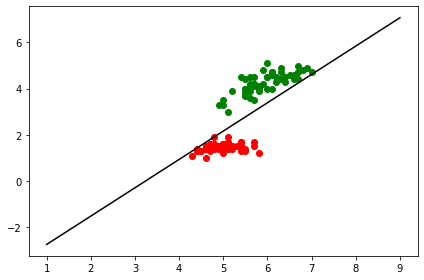

In [20]:
# Visualizing how classifier boundary shifted during during iterations i.e. wight learning 
# y = mx + c

#from matplotlib.animation import FuncAnimation, PillowWriter

x = np.arange(1,10,1)

fig,ax = plt.subplots()
fig.set_tight_layout(True)

## Plotting data for 0  and 1 label in color red and blue

plt.scatter(setosas[:,0],setosas[:,1],color='r',label='setosa')
plt.scatter(versicolors[:,0],versicolors[:,1],color='g',label='versicolors')


#Setting final classifier boundary line
slope = boundary_lines[99][0][0]
intercept = boundary_lines[99][1][0]

line, = ax.plot(x, x*slope + intercept, color = 'black')

In [21]:
 from matplotlib.animation import FuncAnimation, PillowWriter

 #aniamtion function
def animate(i):
    slope = boundary_lines[i][0][0]
    intercept = boundary_lines[i][1][0]
    line.set_ydata(x*slope + intercept)
    label = f'Epoch: {i+1} \n\n Y = {round(slope, 3)}X + {round(intercept, 3)}'
    ax.set_xlabel(label)
    return line, ax

 #animating over 100 frames, with an interval of 200 ms between frames
ani = FuncAnimation(fig, animate, frames=np.arange(0, no_epoch), interval=100)
 #save gif
plt.show()
ani.save('/content/drive/My Drive/perceptron_vis0.gif', dpi=100, writer='pillow')

In [22]:
from IPython.display import HTML
HTML('<img src="/content/drive/My Drive/perceptron_vis0.gif">')

# Testing the model

In [23]:
x_test.shape

(20, 2)

In [24]:
def predict(weight, bias, test_data):
  activation = test_data[0]*weights[0]+test_data[1]*weights[1] + weights[2]
  return 1 if activation > 0 else 0

y_pred = []
w = boundary_lines[99][0][0]
b = boundary_lines[99][0][0]
for i in range(x_test.shape[0]):
  y_pred.append(predict(w,b,x_test[i]))

In [25]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)


[[12  0]
 [ 0  8]]


In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [29]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score

print("f1_Score :",f1_score(y_test,y_pred))
print("Accuracy_Score :",accuracy_score(y_test,y_pred))
print("Recall_Score :",recall_score(y_test,y_pred))
print("Precision_Score :",precision_score(y_test,y_pred))

f1_Score : 1.0
Accuracy_Score : 1.0
Recall_Score : 1.0
Precision_Score : 1.0
